In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [21]:
df = pd.read_csv("../data/adausdt.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2021-11-01 08:00:00,1.965,2.019,1.911,1.949,144061135.4,1635811199999,2.824457e+08,443944,71078236.0,1.394258e+08,0
1,2021-11-02 08:00:00,1.949,1.996,1.933,1.971,124263204.0,1635897599999,2.446304e+08,382592,64339347.3,1.267002e+08,0
2,2021-11-03 08:00:00,1.971,2.144,1.950,2.063,335561983.7,1635983999999,6.936646e+08,1237122,167743048.3,3.467647e+08,0
3,2021-11-04 08:00:00,2.063,2.103,1.933,1.983,174549100.4,1636070399999,3.509825e+08,586577,80789835.4,1.624612e+08,0
4,2021-11-05 08:00:00,1.983,2.017,1.959,1.982,108180863.7,1636156799999,2.150281e+08,346939,51873631.3,1.030921e+08,0


The trading strategy is simple:
- Long the stock if the shorter SMA > longer SMA
- Short  the stock if the shorter SMA < longer SMA

In [22]:
short_sma = 7
long_sma = 14

In [23]:
df['SMA1'] = df['Close'].rolling(short_sma).mean()
df['SMA2'] = df['Close'].rolling(long_sma).mean()
# drop the rows with NaN entries
df.dropna(inplace=True)
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore,SMA1,SMA2
13,2021-11-14 08:00:00,2.050,2.070,2.009,2.040,5.985961e+07,1636934399999,1.219394e+08,205494,2.758593e+07,5.621922e+07,0,2.100857,2.048571
14,2021-11-15 08:00:00,2.040,2.095,2.011,2.017,9.307958e+07,1637020799999,1.908580e+08,344074,4.627795e+07,9.494217e+07,0,2.085429,2.053429
15,2021-11-16 08:00:00,2.018,2.018,1.759,1.874,2.689414e+08,1637107199999,5.118339e+08,915144,1.283961e+08,2.445154e+08,0,2.028857,2.046500
16,2021-11-17 08:00:00,1.874,1.893,1.795,1.876,2.079852e+08,1637193599999,3.845280e+08,546022,1.046437e+08,1.934498e+08,0,1.997286,2.033143
17,2021-11-18 08:00:00,1.877,1.907,1.701,1.786,2.217599e+08,1637279999999,4.020876e+08,559018,1.045470e+08,1.896849e+08,0,1.955429,2.019071


In [24]:
df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)

In [25]:
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore,SMA1,SMA2,Position
13,2021-11-14 08:00:00,2.050,2.070,2.009,2.040,5.985961e+07,1636934399999,1.219394e+08,205494,2.758593e+07,5.621922e+07,0,2.100857,2.048571,1
14,2021-11-15 08:00:00,2.040,2.095,2.011,2.017,9.307958e+07,1637020799999,1.908580e+08,344074,4.627795e+07,9.494217e+07,0,2.085429,2.053429,1
15,2021-11-16 08:00:00,2.018,2.018,1.759,1.874,2.689414e+08,1637107199999,5.118339e+08,915144,1.283961e+08,2.445154e+08,0,2.028857,2.046500,-1
16,2021-11-17 08:00:00,1.874,1.893,1.795,1.876,2.079852e+08,1637193599999,3.845280e+08,546022,1.046437e+08,1.934498e+08,0,1.997286,2.033143,-1
17,2021-11-18 08:00:00,1.877,1.907,1.701,1.786,2.217599e+08,1637279999999,4.020876e+08,559018,1.045470e+08,1.896849e+08,0,1.955429,2.019071,-1


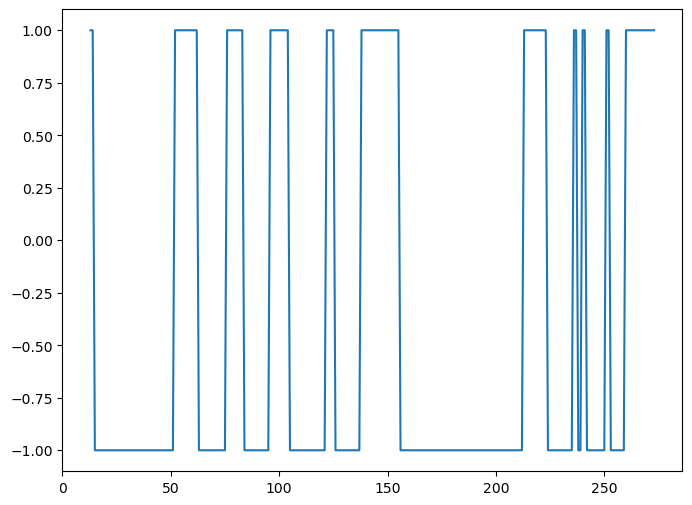

In [26]:
ax = df['Position'].plot(figsize=(8,6))

## Machine Learning Approach: Classification

Another strategy is that we compute the log returns for each consecutive timestamps.

In [27]:
df = pd.read_csv("../data/adausdt.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2021-11-01 08:00:00,1.965,2.019,1.911,1.949,144061135.4,1635811199999,2.824457e+08,443944,71078236.0,1.394258e+08,0
1,2021-11-02 08:00:00,1.949,1.996,1.933,1.971,124263204.0,1635897599999,2.446304e+08,382592,64339347.3,1.267002e+08,0
2,2021-11-03 08:00:00,1.971,2.144,1.950,2.063,335561983.7,1635983999999,6.936646e+08,1237122,167743048.3,3.467647e+08,0
3,2021-11-04 08:00:00,2.063,2.103,1.933,1.983,174549100.4,1636070399999,3.509825e+08,586577,80789835.4,1.624612e+08,0
4,2021-11-05 08:00:00,1.983,2.017,1.959,1.982,108180863.7,1636156799999,2.150281e+08,346939,51873631.3,1.030921e+08,0


In [28]:
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)
df['direction'] = np.sign(df['returns']).astype(int)

In [29]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, 3):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)
    print('The following columns have been added: \n')
    print(cols)

In [30]:
create_lags(df)

The following columns have been added: 

['lag_1', 'lag_2']


In [31]:
df.dropna(inplace=True)

In [32]:
split = int(len(df) * 0.80)

In [33]:
train = df.iloc[:split].copy()
train.shape

(216, 16)

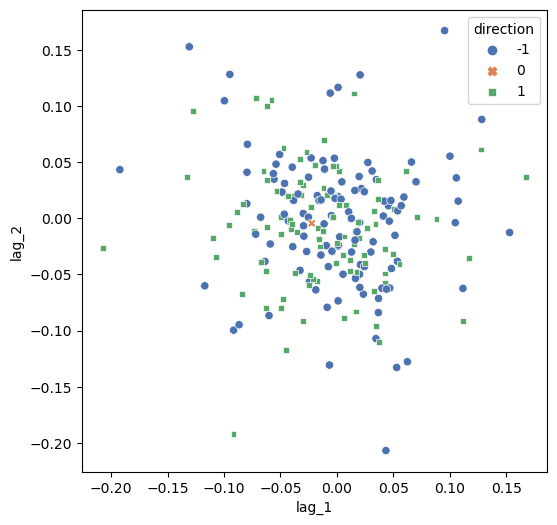

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(6,6))
fig = sns.scatterplot(data=train, x="lag_1", y="lag_2", hue="direction", style="direction", palette="deep")

For our logistic regression model, 

$$
z = \overrightarrow{w} \cdot \overrightarrow{x} + b
$$

From the raw features data, we transformed into a polynomial with terms $x_1$ and $x_2$, 
which represents `lag_1` and `lag_2` respectively.

$$
y = w_1 x_1 + w_2 x_2 + w_3 x_1^2 + \cdots + w_n x_1^7 x_2^8
$$

In [35]:
import sys
sys.path.append('../')

from utils import *

X_mapped = map_feature(train.lag_1, train.lag_2)
X_mapped

array([[ 4.56202059e-02,  1.12246076e-02,  2.08120319e-03, ...,
         3.30368902e-11,  8.12855011e-12,  1.99998628e-12],
       [-3.95503846e-02,  4.56202059e-02,  1.56423292e-03, ...,
         6.77532896e-09, -7.81514278e-09,  9.01453745e-09],
       [-5.04413630e-04, -3.95503846e-02,  2.54433110e-07, ...,
         6.22553198e-13,  4.88135469e-11,  3.82740362e-09],
       ...,
       [ 1.15402967e-02, -4.72583793e-02,  1.33178449e-04, ...,
         6.64277050e-10, -2.72026426e-09,  1.11396859e-08],
       [ 1.58744191e-03,  1.15402967e-02,  2.51997181e-06, ...,
         4.46954780e-14,  3.24924696e-13,  2.36211946e-12],
       [ 7.09179355e-02,  1.58744191e-03,  5.02935357e-03, ...,
         3.19376923e-14,  7.14899987e-16,  1.60024709e-17]])

In [36]:
# Initialize fitting parameters
np.random.seed(42)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

y_train = train.direction.to_numpy()

w,b, J_history,_ = gradient_descent(z_scaler(X_mapped), y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     1.53   
Iteration 1000: Cost    -0.28   
Iteration 2000: Cost    -0.62   
Iteration 3000: Cost    -0.90   
Iteration 4000: Cost    -1.15   
Iteration 5000: Cost    -1.40   
Iteration 6000: Cost    -1.64   
Iteration 7000: Cost    -1.88   
Iteration 8000: Cost    -2.12   
Iteration 9000: Cost    -2.36   
Iteration 9999: Cost    -2.60   


once computed, the fitting parameters are

In [37]:
w

array([-2.92206597, -1.32196265, -5.53293367, -0.06750312, -6.58118192,
       -0.10098662, -0.76434892,  0.10135556, -0.05894041, -0.08101532,
       -0.65837157,  0.24105142,  0.15985536, -0.59911192, -0.4938159 ,
       -0.51202805, -0.38572925, -0.17016276, -0.26438685, -0.39824328,
       -0.08270446, -0.55160589, -0.4001411 , -0.32527461, -0.23634586,
        0.09425634, -0.49549003])

/home/pehcy/projects/binoculars/src/notebook/../utils.py:5: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(np.negative(z)))


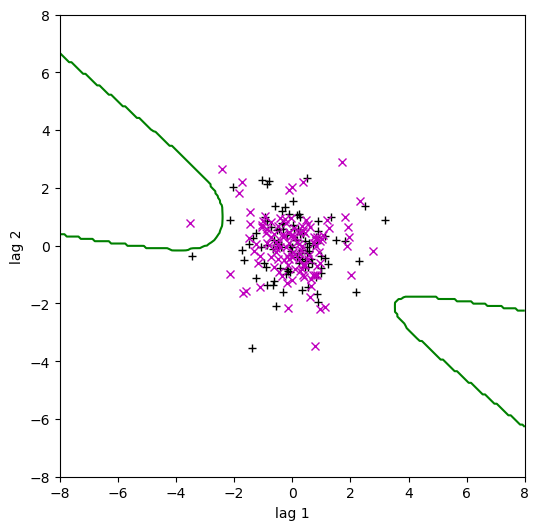

In [38]:
is_positive = train[train['direction'] > 0]
is_negative = train[train['direction'] <= 0]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(z_scaler(is_positive['lag_1']), z_scaler(is_positive['lag_2']), 'k+')
ax.plot(z_scaler(is_negative['lag_1']), z_scaler(is_negative['lag_2']), 'mx')
plt.xlabel('lag 1')
plt.ylabel('lag 2')
plot_decision_boundary(ax, w, b, z_scaler(X_mapped), y_train)